## Введение в анализ данных

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.read_csv('tg.csv')

,date,subscribers,views,shares,url,groups,pm,search,muted,joined
0,27/02/2023,113.0,14,0,0,0,0,0,0,0
1,28/02/2023,117.0,373,5,3,1,0,0,0,4
2,01/03/2023,122.0,247,1,4,0,1,0,4,5
3,02/03/2023,179.0,1111,9,56,0,1,2,18,59
4,03/03/2023,220.0,667,4,38,0,0,4,14,43
5,04/03/2023,222.0,111,1,2,0,0,0,0,2
6,05/03/2023,226.0,122,0,3,0,0,1,3,4
7,06/03/2023,294.0,1041,2,67,0,0,0,16,68
8,07/03/2023,360.0,1421,7,66,0,2,1,24,71
9,08/03/2023,370.0,545,8,10,0,0,0,3,13


## Строим графики

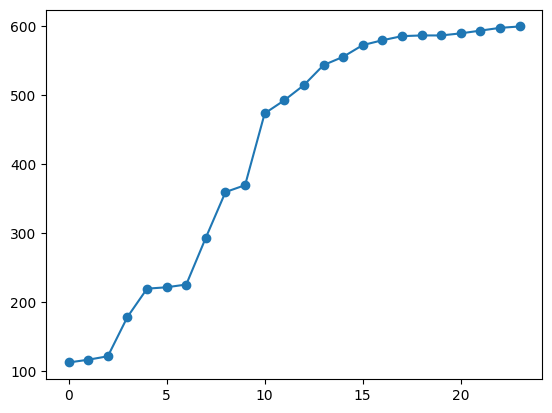

In [46]:
# Здесь мы считываем данные из файла 'data.csv' в переменную df и tg
# Метод .values используется для преобразования данных в массив numpy

df = pd.read_csv('data.csv').values
tg = pd.read_csv('tg.csv').values

# Мы создаем переменную subscribers, которая содержит значения из столбца с индексом 1 в массиве tg
subscribers = tg[:, 1]

# Мы создаем массив x, который содержит числа от 0 до 23 с шагом 1
# Этот массив будет использоваться для оси x на графике
x = np.arange(0, 24, 1)

# Мы создаем scatter plot (точечную диаграмму) с использованием значений x и subscribers
# Это позволяет нам визуализировать зависимость количества подписчиков от времени
plt.scatter(x, subscribers)
plt.plot(x, subscribers)

plt.show()

# Интерполяция
## Создаем полезные функции

1. В первой функции sample_x() создается массив случайных чисел от 0 до upper_bound и перемешивается с помощью функции shuffle() из модуля random. Затем выбираются point_quantity первых элементов и сортируются по возрастанию. Полученный массив возвращается.

2. Во второй функции sample_y() создается пустой массив sample_y_array типа numpy.array(). Затем происходит итерация по элементам массива sample_x_array, на каждой итерации извлекается элемент с соответствующим индексом из колонки column и добавляется в массив sample_y_array. Полученный массив возвращается.

3. В третьей функции interpolation() с помощью функции polyfit() из модуля numpy находятся коэффициенты многочлена f степени power, который проходит через массивы значений x и y. Затем с помощью функции poly1d() создается объект-многочлен f, который может быть использован для вычисления значений многочлена. Возвращается список, содержащий сам многочлен f и его коэффициенты coefs.

In [6]:
import random as rd

def sample_x(point_quantity, upper_bound):
    sample_x_array = list(range(upper_bound)) 
    rd.shuffle(sample_x_array)
    sample_x_array = sorted(sample_x_array[:point_quantity])
    return sample_x_array

# по заданному массиву чисел и колонке из датасета возвращает массив соответствующих числам элементов колонки
def sample_y(sample_x_array, column):
    sample_y_array = np.array([])
    for i in range(len(sample_x_array)):
        sample_y_array = np.append(sample_y_array, column[sample_x_array[i]])

    return sample_y_array

#создет мнгочлен f степени power, который проходит через массивы значений x, y
def interpolation(x, y, power):
    coefs = np.polyfit(x, y, power)
    f = np.poly1d(coefs)
    return [f, coefs]


## Строим интерполяционные многочлены

[34.78338279 69.19287834]
903.994065281899


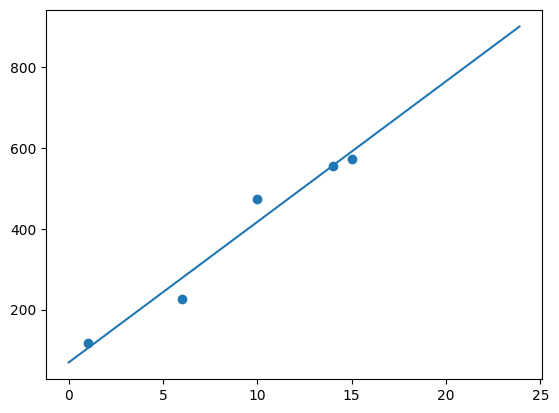

In [61]:
x = sample_x(5, 20)
y = sample_y(x, tg[:, 1])

plt.scatter(x, y)

# Задаем аргументы для интерполяции
interpolation_argument = np.arange(0, 24, 0.1) 
# Интерполируем функцию по значениям x и y, степень интерполяционного многочлена равна 1, поменяйте и посмотрите, что получится!!!!!
f = interpolation(x, y, 1)[0]

# Получаем коэффициенты многочлена интерполяции, индекс [1] нужен так как функция interpolation возвращает массив из 2-х аргументов
coefs = interpolation(x, y, 1)[1]

# Выводим коэффициенты многочлена
print(coefs)
# Выводим предсказанное значение в точке 24, поменяйте и посмотрите, что измениться
print(f(24)) 

# Отображаем график интерполированной функции
plt.plot(interpolation_argument, f(interpolation_argument))

plt.show()

# Линейная регрессия
## Пробуем в ручную

In [6]:
# Задаем начальные условия для линейной регрессии
f0 = np.arange(0, 24, 1) # Значения x
f0[:] = 1 # Задаем значения f0 как 1 из-за размерности, попытайтесь понять, почему (или почитайте в статье)

f1 = np.arange(0, 24, 1)

y = tg[:, 1] # Значения y, которые мы собираемся предсказать

w = np.array([]) # Создаем пустой массив для весов
for i in range(24):
    w = np.append(w, np.nan) # Заполняем массив w 

X = np.array([f0, f1]).T # Матрица признаков X

# Вычисляем коэффициенты линейной регрессии - реализуем формулу аналитического решения, вывод которой можно найти в статье в чате
coef_matrix = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) 
print(coef_matrix)


[137.3633333333333 24.649565217391306]


In [ ]:
X = np.array([f0, f1]).T

## Используем sklearn

In [ ]:
# Импорт модуля LinearRegression из библиотеки sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Создание объекта модели линейной регрессии
model = LinearRegression().fit(X, y)

# Получение коэффициентов модели и их транспонирование
coef_sklearn = model.coef_.T

# Замена первого элемента на значение перехвата (intercept) модели, по это если хотите погуглите, но позже разберем
coef_sklearn[0] = model.intercept_

# Выводим коэффициенты и убеждаемся, что результат одинаковый!
print(coef_sklearn)


## Посмотрим на графике

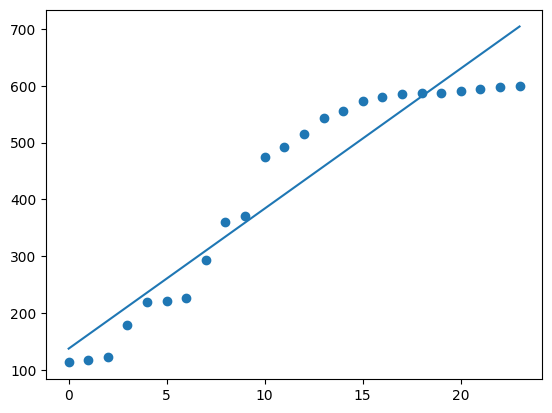

728.9528985507245


In [8]:
x = np.arange(0, 24, 1)

# Накидываем точки, где x - значения x, subscribers - значения y
plt.scatter(x, subscribers)

# Создание полинома по коэффициентам coef_matrix, которую мы получили два блока назад
f = np.poly1d(np.flip(coef_matrix))

# Вычисление значений полинома для каждого значения x
g = f(x)

# Построение графика полинома
plt.plot(x, g)

plt.show()

print(f(24))

[431.59340659   7.65934066]
615.4175824175825


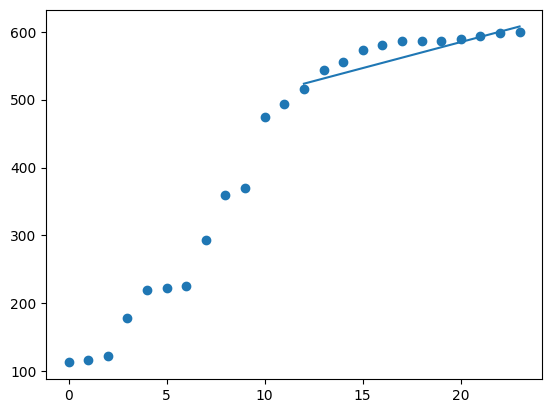

In [9]:
f0 = np.arange(0, 13, 1)
f0[:] = 1
f1 = np.arange(12, 25, 1)
y = tg[11:24][:, 1]
w = np.array([])
for i in range(12):
    w = np.append(w, np.nan)
    
X = np.array([f0, f1]).T
    
model = LinearRegression().fit(X, y)
coef_sklearn = model.coef_.T
coef_sklearn[0] = model.intercept_
print(coef_sklearn)

x = np.arange(0, 24, 1)

plt.scatter(x, subscribers)

f = np.poly1d(np.flip(coef_sklearn))
x = np.arange(12, 24, 1)
g = f(x)

print(f(24))

plt.plot(x, g)

plt.show()